In [1]:
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
import datetime

In [8]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])

In [9]:
files

['1okha.nc',
 '2mumbai.nc',
 '3jaigarh_4incl.nc',
 '4goa_24_added.nc',
 '5udupi.nc',
 '6kollam_24_added.nc',
 '7kanyakumari.nc']

In [10]:
ds = [xr.open_dataset(path+f) for f in files]


In [11]:
for i in range(7):
    dsd = ds[i].resample(TIME='24h').mean()
    dsm = ds[i].resample(TIME='ME').mean()
#    dsd.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/daily/"+files[i])
#    dsm.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/monthly/"+files[i])

In [16]:
figlab1 = ["a1)","b1)","c1)","d1)","e1)","f1)","g1)"]
figlab2 = ["a2)","b2)","c2)","d2)","e2)","f2)","g2)"]
names = ["__ 175 Okha",'__215 Mumbai','__ 200 Jaigarh',"__ 215 Goa","__ 200 Udupi","__ 215 Kollam","__ 175 Kanyakumari"]

bmc_pos = [(10000,85),(10000,85),(20004,85),(10000,85),(10000,100),(10000,80),(10000,85)] #for the contourlabel positioning
bmz = [175,215,200,215,200,215,175]

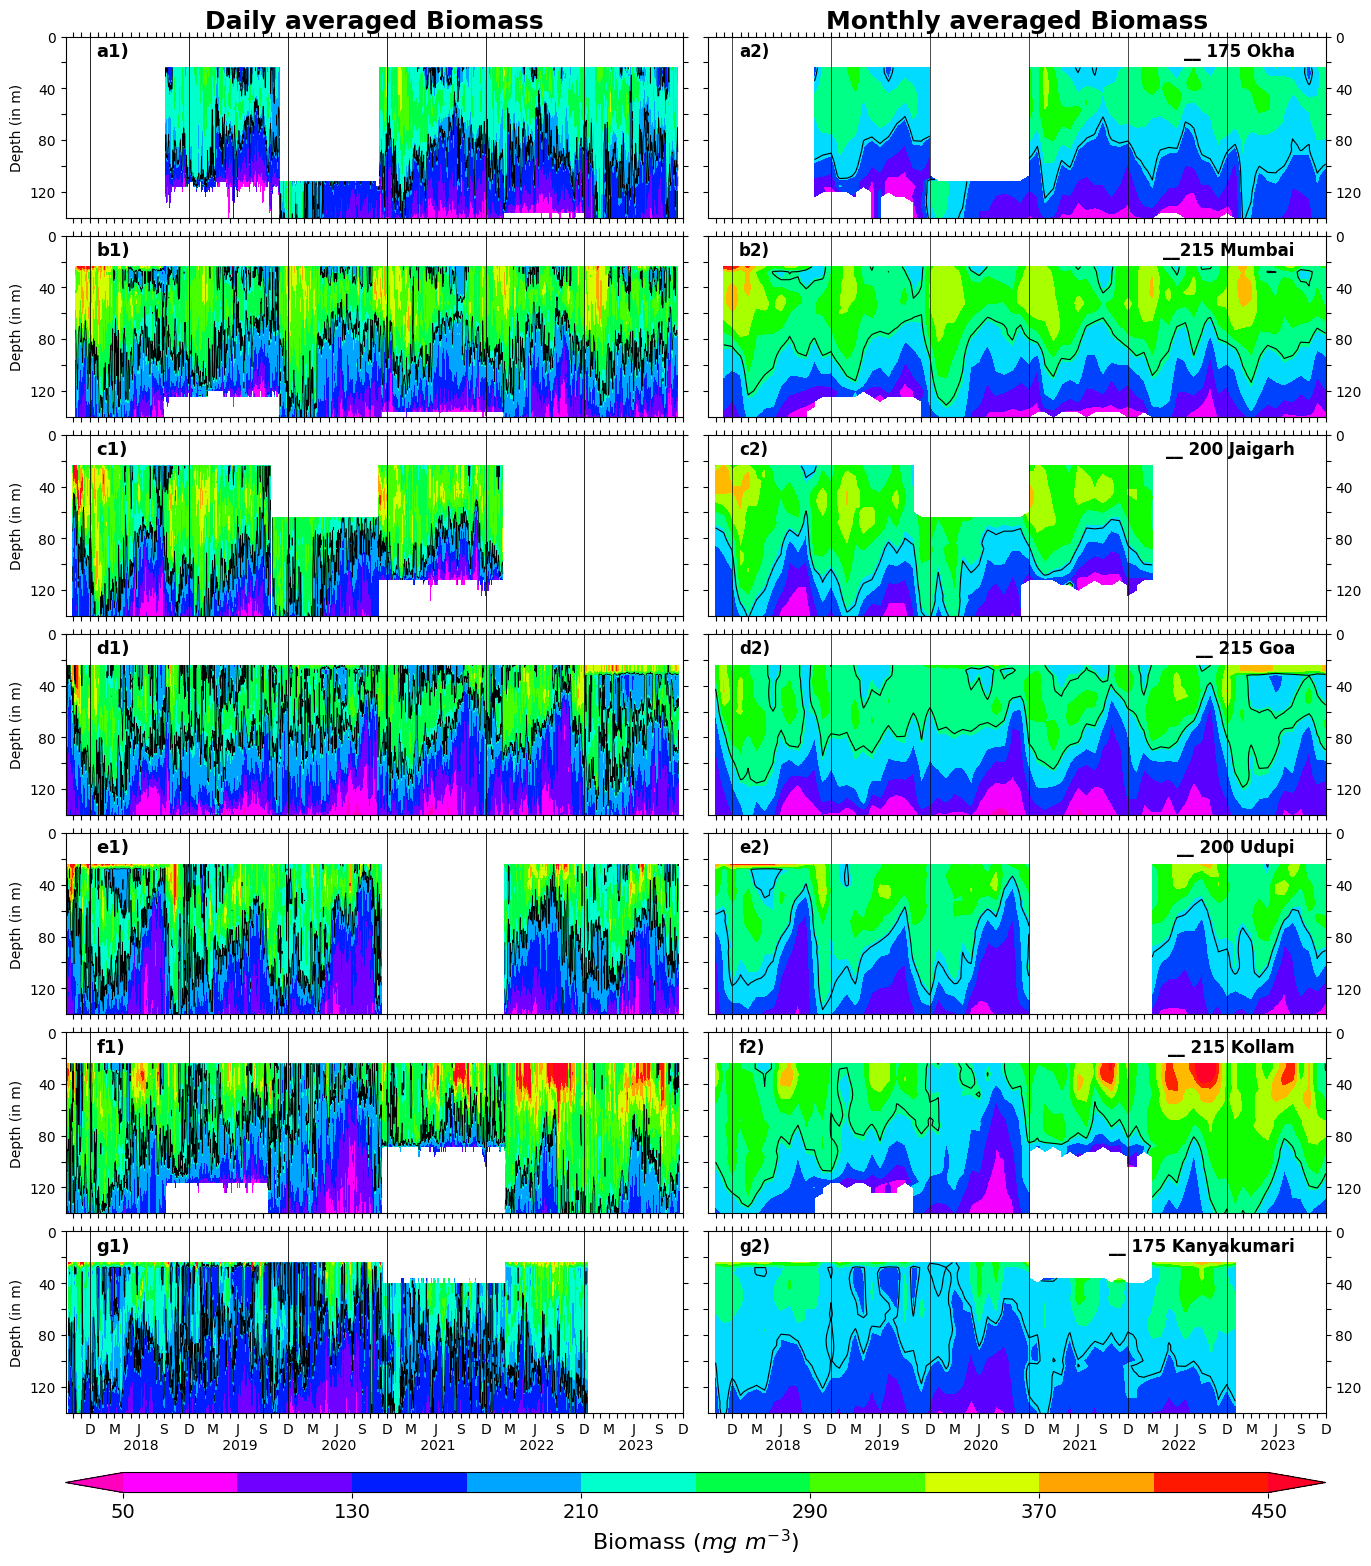

In [18]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(14,16),sharex=True,sharey=True)
#names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
plt.subplots_adjust(wspace=0.04,left=0.05,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsd = ds[i].resample(TIME='24h').mean()
    dsm = ds[i].resample(TIME='ME').mean()
    tklb = []
    for t in dsm.TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i,0].axvline(t,color='k',linewidth=0.6)
            ax[i,1].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")

    x = ax[i,0].contourf(dsd.TIME,dsd.DEPTH1[6:],dsd.BIOMASS1[:,6:,0,0].T,levels=np.arange(50,490,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contourf(dsm.TIME,dsm.DEPTH1[6:],dsm.BIOMASS1[:,6:,0,0].T,levels=np.arange(50,450,40),extend="both",cmap="gist_rainbow_r")
    bmc = ax[i,1].contour(dsm.TIME,dsm.DEPTH1[6:],dsm.BIOMASS1[:,6:,0,0].T,levels=[bmz[i]],linewidths=0.8,colors='k')
#    ax[i,1].clabel(bmc, inline=True, fontsize=9,manual=[bmc_pos[i]])

    ax[i,0].contour(dsd.TIME,dsd.DEPTH1[6:],dsd.BIOMASS1[:,6:,0,0].T,levels=[bmz[i]],linewidths=0.5,colors='k')
    ax[i,1].text(0.95, 0.97, names[i],transform=ax[i,1].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    
    ax[i,1].text(0.05, 0.97, figlab2[i],transform=ax[i,1].transAxes, fontsize=12, va='top', ha='left',color='black',fontweight="bold")    
    ax[i,0].text(0.05, 0.97, figlab1[i],transform=ax[i,0].transAxes, fontsize=13, va='top', ha='left',color='black',fontweight="bold")    
    
    ax[i,0].set_ylabel("Depth (in m)")
    ax[i,0].set_yticks(custom_ticks)
    ax[i,0].set_yticklabels(custom_labels)
#    ax[i,1].set_yticks(custom_ticks)    
    ax[i,0].tick_params(right=True, top=True,labeltop=False)
    ax[i,1].tick_params(right=True, top=True,labelright=True)
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()
    
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()

ax[1,1].set_xticks(dsm.TIME,tklb)

ax[0,0].set_title("Daily averaged Biomass",fontsize=18,fontweight='bold')
ax[0,1].set_title("Monthly averaged Biomass",fontsize=18,fontweight='bold')

cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \\ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/biomass_daily_monthly.png",dpi=300,facecolor='w')
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/biomass_daily_monthly.png",dpi=300,facecolor='w')


# for just montly values

In [13]:
bmz = [175,215,200,215,200,215,175]

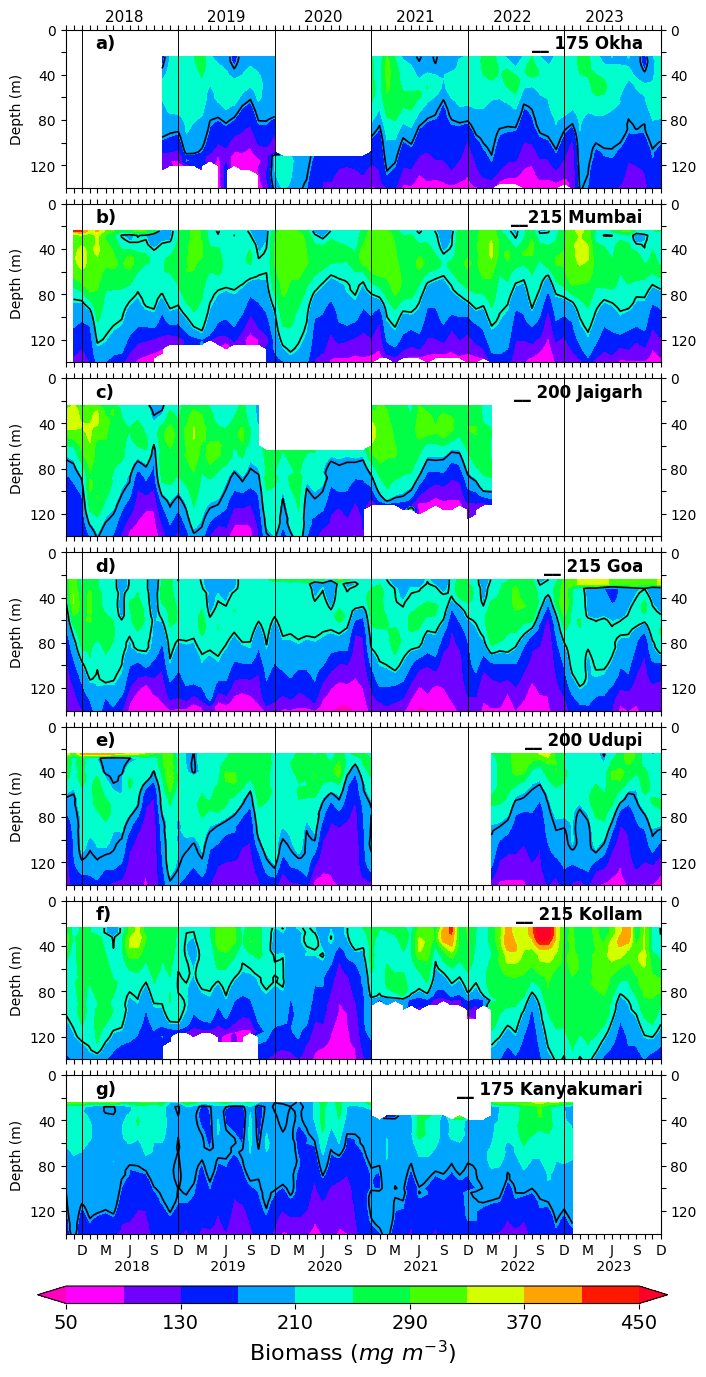

In [19]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(7,14),sharex=True,sharey=True)
#names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
figlab = ["a)","b)","c)","d)","e)","f)","g)"]

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.09,top=0.95,hspace=0.1,right = 0.94)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsm = ds[i].resample(TIME='ME').mean()
    tklb = []
    for t in dsm.TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
            ax[i].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")

    x = ax[i].contourf(dsm.TIME,dsm.DEPTH1[6:],dsm.BIOMASS1[:,6:,0,0].T,levels=np.arange(50,490,40),extend="both",cmap="gist_rainbow_r")
    ax[i].contour(dsm.TIME,dsm.DEPTH1[6:],dsm.BIOMASS1[:,6:,0,0].T,levels=[bmz[i]],linewidths=1.2,colors='k')
    ax[i].text(0.97, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i].set_ylabel("Depth (m)")
    ax[i].text(0.05, 0.97, figlab[i],transform=ax[i].transAxes, fontsize=13, va='top', ha='left',color='black',fontweight="bold")    
    ax[i].set_yticks(custom_ticks)
    ax[i].set_yticklabels(custom_labels)
    ax[i].tick_params(right=True, top=True,labeltop=False)
    ax[i].tick_params(right=True, top=True,labelright=True)
    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].invert_yaxis()
    
    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].invert_yaxis()

ax[1].set_xticks(dsm.TIME,tklb)

ax[0].set_title("        2018             2019            2020           2021            2022           2023",fontsize=11,loc='left')

cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \\ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/biomass_monthly.png",dpi=300,facecolor='w')
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/biomass_monthly.png",dpi=300,facecolor='w')

# Try plotting in polar project

In [ ]:
path = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/ss/"

files = sorted([f for f in os.listdir(path) if f.endswith(".nc")])

In [ ]:
ds = [xr.open_dataset(path+f) for f in files]
dsm = [ds[i].resample(TIME1='ME').mean() for i in range(len(ds))]


In [ ]:

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(7,5),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
colors = ['r','k','b','r','k','b','r']

#linestyles = ['-','--','-.','-','--','-.','-']

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.08,top=0.95,hspace=0.1,right = 0.95)
for i in range(3):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan)
    ax[0].plot(aa,color=colors[i],label=names[i])
ax[0].legend(bbox_to_anchor=(1,1), ncol=3)

for i in range(3,6):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T    
    aa = aa.where(aa!=0,np.nan)
    ax[1].plot(aa,color=colors[i],label=names[i])
ax[1].legend(bbox_to_anchor=(1,1), ncol=3)
ax[1].set_ylabel("SS ($gm \ m^{-2}$)")
for i in range(6,7):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T 
    aa = aa.where(aa!=0,np.nan)
    ax[2].plot(aa,color=colors[i],label=names[i])
ax[2].legend(bbox_to_anchor=(1,1), ncol=3)


ax[2].set_xticks(np.arange(0,12,1))
ax[2].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
fig.suptitle("Depth integrated Standing Stock")

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/standing_stock_dep_22_118_all_aval.png",dpi=300,facecolor='w')
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/standing_stock_dep_22_118_all_aval.png",dpi=300)

# 40 and 100 m biomass comparison

In [2]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])
ds = [xr.open_dataset(path+f) for f in files]

In [3]:
dsd = [ds[i].resample(TIME='24h').mean() for i in range(len(files))]

In [4]:
dsm = [ds[i].rolling(TIME=720,min_periods=48).mean() for i in range(len(files))]

In [5]:
dsmon = [ds[i].resample(TIME='ME').mean() for i in range(7)]

Text(0.5, 0, 'Time')

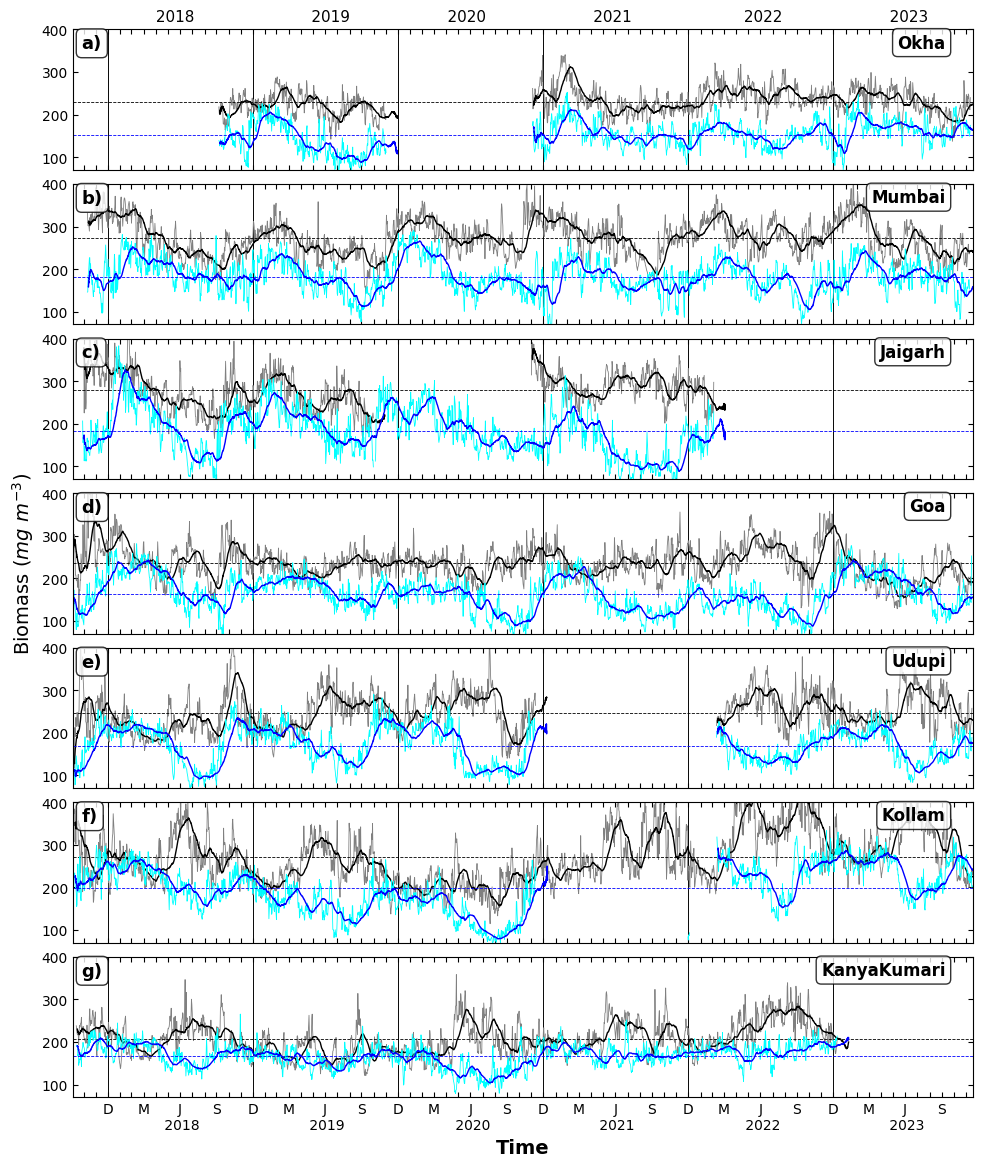

In [6]:
import pandas as pd
figlab = ["a)","b)","c)","d)","e)","f)","g)"]
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(10,12),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","KanyaKumari"]


plt.subplots_adjust(wspace=0.04,left=0.07,bottom=0.06,top=0.95,hspace=0.1,right = 0.97)
diff_40_104 = []      #diff in biomass btween 40 and 104
bm40 = []            #mean biomass at 40 m
bm104 = []          #mean biomass at 104 m

std40 = []     #std at 40m
std104 = []     #std at 104 m

for i in range(7):
    tklb = []
    for t in dsmon[i].TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
            ax[i].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
            
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS1[:,10,0,0].T,linewidth=0.6,color='grey',label="daily biomass (40m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS1[:,10,0,0].T,linewidth=1,color='k',label="monthly biomass (40m)")
    # plot the mean line for each
    ax[i].axhline(dsm[i].BIOMASS1[:,10,0,0].T.mean(),linewidth=0.6,linestyle='--',color='black',label="mean (40m)")
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS1[:,26,0,0].T,linewidth=0.6,color='cyan',label="daily biomass (104m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS1[:,26,0,0].T,linewidth=1,color='blue',label="monthly biomass (104m)")
    diff = dsm[i].BIOMASS1[:,10,0,0].T.mean() - dsm[i].BIOMASS1[:,26,0,0].T.mean()
    bm40.append(dsm[i].BIOMASS1[:,10,0,0].T.mean().values.round(4))
    bm104.append(dsm[i].BIOMASS1[:,26,0,0].T.mean().values.round(4))
    diff_40_104.append(diff.values.round(4))
    std40.append(dsm[i].BIOMASS1[:,10,0,0].T.std().values.round(4))
    std104.append(dsm[i].BIOMASS1[:,26,0,0].T.std().values.round(4))
    
    ax[i].axhline(dsm[i].BIOMASS1[:,26,0,0].T.mean(),linewidth=0.6,linestyle='--',color='blue',label="mean (104m)")
    ax[i].text(0.01, 0.965, figlab[i],transform=ax[i].transAxes, fontsize=13, va='top', ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    

    ax[i].set_xticks(dsmon[i].TIME,tklb)

    ax[i].text(0.97, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))
    ax[i].tick_params(axis='both', which='both', direction='in', right=True, top=True)
    
    
    ax[i].set_xlim(xmin=dsd[i].TIME[0],xmax=dsd[i].TIME[-1])
    ax[i].set_ylim(ymin=70,ymax=400)
ax[0].set_title("                 2018                        2019                    2020                      2021                       2022                      2023",fontsize=11,loc='left')

ax[3].set_ylabel('Biomass ($mg \\ m^{-3}$)',fontsize=14)    


#ax[0].legend(loc='upper left')

ax[6].set_xlabel("Time",fontsize=14,fontweight='bold')

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/biomass_40m_104m.png",dpi=300,facecolor='w')
#plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/biomass_40m_104m.png",dpi=300,facecolor='w')

In [7]:
for i in range(7):
    print(names[i],std40[i],std104[i],bm40[i],bm104[i],"diff",diff_40_104[i])

Okha 22.8371 25.5777 230.4162 151.6791 diff 78.7372
Mumbai 34.9476 30.3402 272.8609 182.2387 diff 90.6222
Jaigarh 36.5247 48.885 278.4476 182.9578 diff 95.4898
Goa 30.3449 36.5384 235.2243 163.0211 diff 72.2032
Udupi 34.373 38.7989 247.8062 169.3715 diff 78.4347
Kollam 54.9385 50.0803 272.5608 198.8884 diff 73.6724
KanyaKumari 30.4171 20.8881 207.0692 167.6291 diff 39.4401


# climatology of standing stock

In [ ]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/ss/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])


In [ ]:
files

In [ ]:
dsd = [xr.open_dataset(path+f) for f in files]
dsm = [dsd[i].resample(TIME1='1ME').mean() for i in range(len(files))]

for i in range(7):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan)
    print(aa.min().values,aa.max().values,"range",aa.max().values-aa.min().values)

In [ ]:

names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
colors = ['r','k','b','r','k','b','r']
fig = plt.figure(figsize=(6,5))
#linestyles = ['-','--','-.','-','--','-.','-']

for i in range(7):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan) 
    aa = aa - np.mean(aa) - 4 * i
    plt.plot(aa,color='k',label=names[i])
    plt.gca().set_xticks(np.arange(0,12,1))

plt.gca().tick_params(left=False,labelleft=False,right=False,labelright=False)
plt.plot([6,10],[-25,-12],color='red')
plt.gca().set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.title("Depth integrated Standing Stock")
plt.text(11,-3,"<- -NEAS- ->",rotation=-90)
plt.text(11,-16,"<- - - - - CEAS - - - - ->",rotation=-90)
plt.text(11,-26,"<- -SEAS- ->",rotation=-90)

fig.tight_layout()
plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/propagation_of_minima_to_ceas.png",dpi=300,facecolor='w')


# Climatology of zss

In [169]:
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
import datetime
from matplotlib.ticker import MultipleLocator, ScalarFormatter
path = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/"
files = sorted(glob.glob(path+"*.nc"))
dsd = [xr.open_dataset(f) for f in files]
dsm = [dsd[i].resample(TIME='1ME').mean() for i in range(len(files))]
clim = [dsm[i].groupby('TIME.month').mean(dim='TIME') for i in range(len(files))]

In [170]:
path_ss = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/ss/ss_clim/"
file_ss = sorted(glob.glob(path_ss+"*.nc"))

ds_ss = [xr.open_dataset(f,decode_times=False) for f in file_ss]

# do not repeat it 
"""
for i in range(len(files)):
    clim[i].to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/clim_py/"+files[i][77:-3]+"_clim.nc")
"""

'\nfor i in range(len(files)):\n    clim[i].to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/clim_py/"+files[i][77:-3]+"_clim.nc")\n'

In [171]:
# load the chatterjee climatology data and interpolate to each 4m bins
ch_clim = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/z_astfile/alpha_150_n.nc")
new_depth = np.arange(0, 141, 4)
ch_clim = ch_clim.interp(Depth=new_depth)

#load world ocean atlas oxygen data
#woa = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/oxygen_temp/nio_chemical_parameters_WOA_5.nc",decode_times=False)
#woa = woa.interp(LEV=new_depth)



#load chl climatology_ copernicus
chl = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/chl/chl_clim.nc",decode_times=False)

chl_clim = [chl.CHL_OKH_CLIM,chl.CHL_MUM_CLIM,chl.CHL_JAI_CLIM,chl.CHL_GOA_CLIM,chl.CHL_UDU_CLIM,chl.CHL_KOL_CLIM,chl.CHL_KAN_CLIM]

In [174]:
figlab = ["a)","b)","c)","d)","e)","f)","g)"]
figlab1 = ["a1)","b1)","c1)","d1)","e1)","f1)","g1)"]
figlab2 = ["a2)","b2)","c2)","d2)","e2)","f2)","g2)"]
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]

lons, lats = [],[]
for i in range(7):
    lons.append(clim[i].LON.values[0])
    lats.append(clim[i].LAT.values[0])
lons[0] = lons[0]-0.5 # for okha

# pictorial rep of oxy, temperature

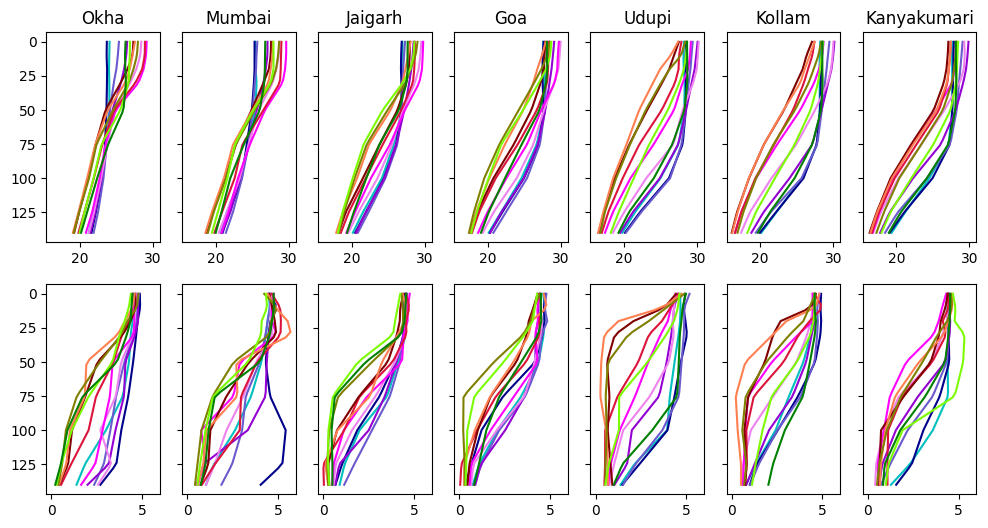

In [175]:
colors = ['c','darkblue','slateblue','darkviolet','violet','fuchsia','crimson','maroon','coral','olive','lawngreen','green']

fig, ax = plt.subplots(nrows=2,ncols=7,figsize=(12,6),sharex='row',sharey='row')

for i in range(7):
    temp = ch_clim.TEMP.sel(Lon=lons[i],Lat=lats[i],method='nearest')
    temp1 = temp.sel(Depth=slice(0,145))
    
    oxy = woa.OXY.sel(LON61_110=lons[i],LAT91_117=lats[i],method='nearest')
    oxy1 = oxy.sel(LEV=slice(0,145))
    for k in range(12):
        ax[0,i].plot(temp1[k,:].T,temp1.Depth[:],color=colors[k])
        ax[1,i].plot(oxy1[k,:].T,oxy1.LEV[:],color=colors[k])        
    ax[0,i].invert_yaxis()
    ax[1,i].invert_yaxis()
    ax[0,i].set_title(names[i])


In [43]:
bmc_pos = [(4,85),(4,85),(4,85),(4,85),(2,100),(2,80),(8,85)]
oxy_pos = [(7,85),(7.2,85),(7,85),(6,85),(7,100),(6,80),(6,85)]

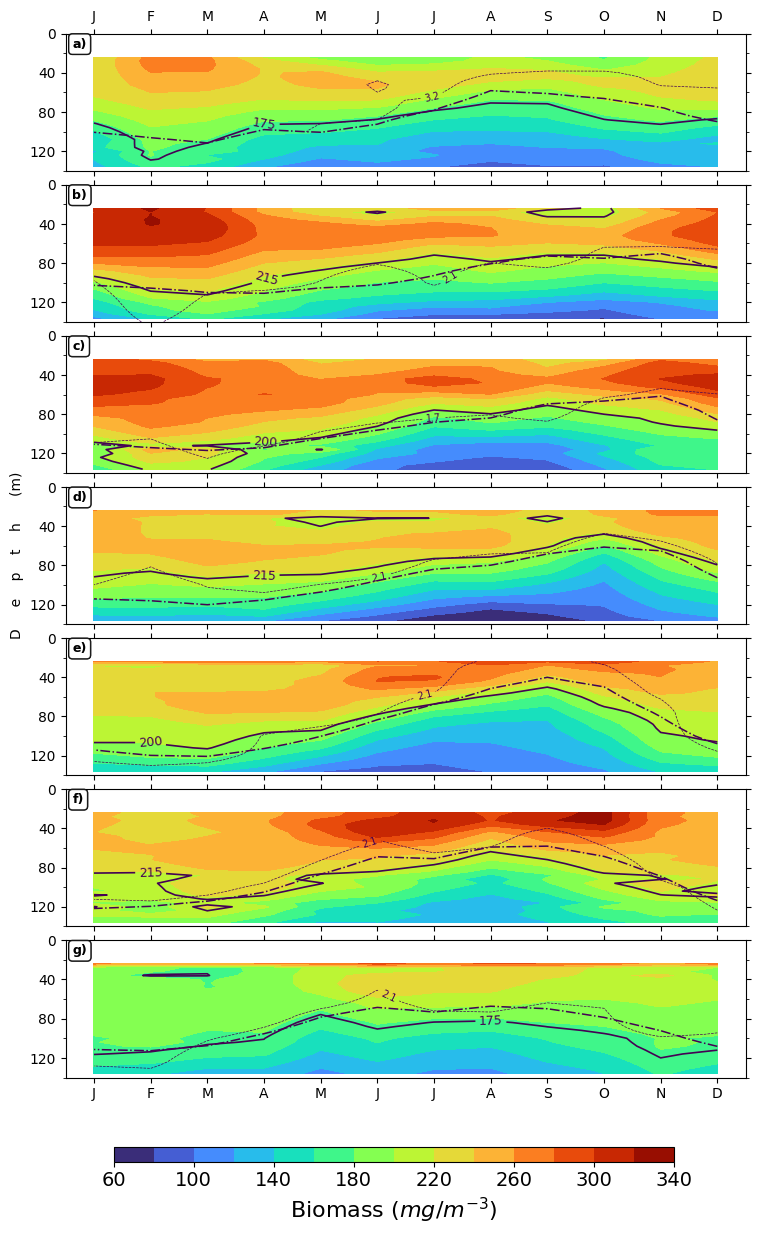

In [166]:
oxy_lev = [3.2,2.1,1.7,2.1,2.1,2.1,2.1]
tmp_lev = [23, 23, 23, 23, 23, 23, 23 ]
bm_lev = [175,215,200,215,200,215,175]

fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(8,12),sharex=True)
plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.11,top=0.98,hspace=0.1,right = 0.94)

for i in range(7):
    x = ax[i].contourf(clim[i].month,clim[i].DEPTH1[6:35],clim[i].BIOMASS1[:,6:35,0,0].T,levels=np.arange(60,341,20),cmap="turbo")
    bmc = ax[i].contour(clim[i].month,clim[i].DEPTH1[6:35],clim[i].BIOMASS1[:,6:35,0,0].T,levels=[bm_lev[i]],linewidths=1.2)
    ax[i].clabel(bmc, inline=True, fontsize=9,manual=[bmc_pos[i]])
    ax[i].set_ylim(ymin=0,ymax=140)

    ax[i].invert_yaxis()
    
    ax[i].yaxis.set_major_locator(MultipleLocator(40))  # Major ticks every 2 units
    ax[i].yaxis.set_minor_locator(MultipleLocator(20))  # Minor ticks every 0.5 units    
    ax[i].yaxis.set_major_formatter(ScalarFormatter())

    temp = ch_clim.TEMP.sel(Lon=lons[i],Lat=lats[i],method='nearest')
    temp1 = temp.sel(Depth=slice(0,145))
    tmc = ax[i].contour(clim[i].month,temp1.Depth[6:],temp1[:,6:].T,levels=[tmp_lev[i]],linestyles='dashdot',linewidths=1.1)
#    ax[i].clabel(tmc, inline=True, fontsize=9)

    oxy = woa.OXY.sel(LON61_110=lons[i],LAT91_117=lats[i],method='nearest')
    oxy1 = oxy.sel(LEV=slice(0,145))
    oxc = ax[i].contour(clim[i].month,oxy1.LEV[6:],oxy1[:,6:].T,levels=[oxy_lev[i]],linestyles='dashed',linewidths=0.5)
    ax[i].clabel(oxc, inline=True, fontsize=7,manual=[oxy_pos[i]])

    ax[i].text(0.010, 0.97, figlab[i],transform=ax[i].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    
    ax[i].text(0.010, 0.97, figlab[i],transform=ax[i].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    

ax[3].set_ylabel("D     e    p    t    h      (m)")
ax[6].set_xticks(np.arange(1,13,1))
ax[6].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
ax[6].set_xlim(xmin=0.5,xmax=12.5)

ax[0].tick_params(axis='x', which='both', bottom=True, top=True, labeltop=True)
ax[0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

for i in range(1,6):
    ax[i].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[6].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
ax[6].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

cax = fig.add_axes([0.15, 0.04, 0.7,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg/ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/climatology/climatology_biomass.png",dpi=400)
#plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/climatology_biomass.png",dpi=400)

In [62]:
bmc_pos = [(4,85),(4,85),(4,85),(4,85),(2,100),(2,80),(8,85)]
oxy_pos = [(7,85),(7.2,85),(7,85),(6,85),(7,100),(6,80),(6,85)]
df = pd.DataFrame()
df["names"] = names

SS chl
5.1015 0.7202
7.5083 0.3911
7.5219 0.1489
6.1077 0.5533
6.0717 1.5385
4.0898 2.2579
1.5621 1.6158


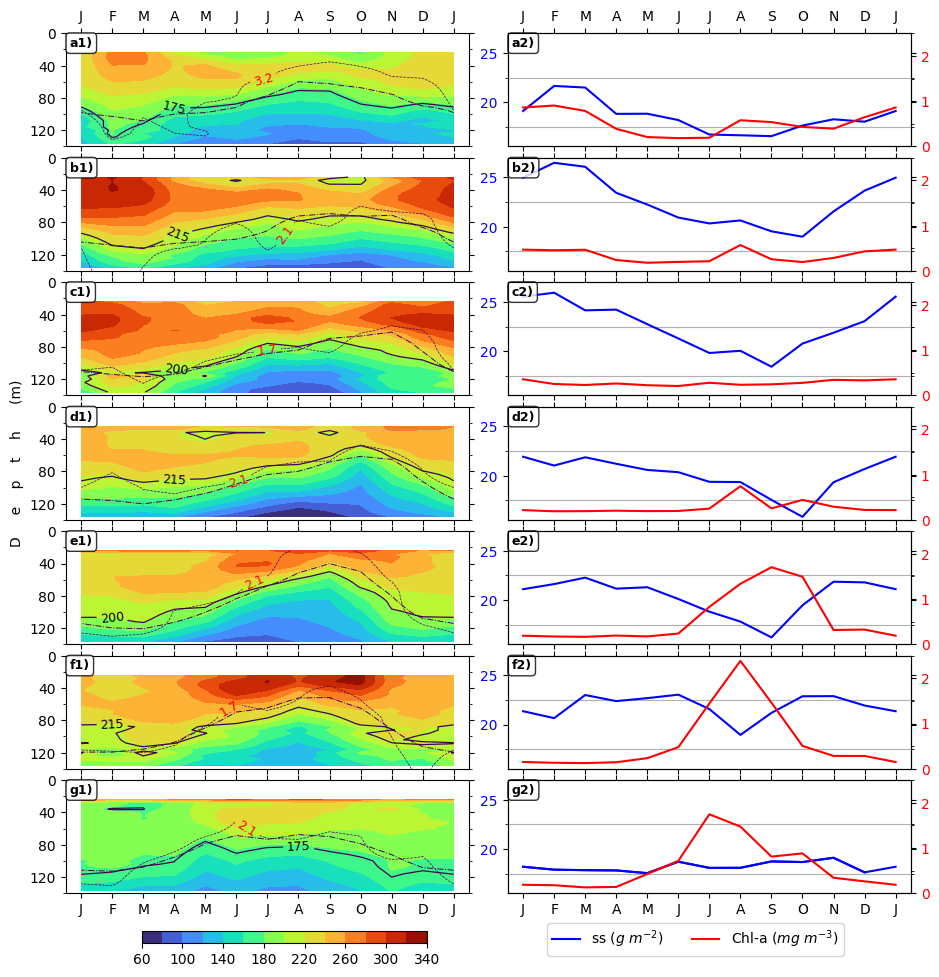

In [49]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(9.5,10),sharex=True)
oxy_lev = [3.2,2.1,1.7,2.1,2.1,1.7,2.1]
tmp_lev = [23, 23, 23, 23, 23, 23, 23 ]
bm_lev = [175,215,200,215,200,215,175]

print("SS","chl")
plt.subplots_adjust(wspace=0.095,left=0.07,bottom=0.09,top=0.95,
                    hspace=0.1,right = 0.96)
ss_range, chl_range = [],[]
ss_max, ss_min = [],[]
chl_max,chl_min = [],[]

for i in range(7):
    new_time = np.arange(1,14,1)
    new_biomass = np.concatenate([clim[i].BIOMASS1[:,6:35,0,0].values,clim[i].BIOMASS1[0:1,6:35,0,0].values])
    
    x = ax[i,0].contourf(new_time,clim[i].DEPTH1[6:35],new_biomass.T,levels=np.arange(60,341,20),cmap="turbo")
    bmc = ax[i,0].contour(new_time,clim[i].DEPTH1[6:35],new_biomass.T,levels=[bm_lev[i]],linewidths=0.9)
    ax[i,0].clabel(bmc, inline=True, fontsize=9,manual=[bmc_pos[i]],colors='k')
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,0].invert_yaxis()
    
    ax[i,0].yaxis.set_major_locator(MultipleLocator(40))  # Major ticks every 2 units
    ax[i,0].yaxis.set_minor_locator(MultipleLocator(20))  # Minor ticks every 0.5 units    
    ax[i,0].yaxis.set_major_formatter(ScalarFormatter())

    temp = ch_clim.TEMP.sel(Lon=lons[i],Lat=lats[i],method='nearest')
    temp1 = temp.sel(Depth=slice(0,145))
    new_temp = np.concatenate([temp1.values,temp1[0:1,:].values])
    ax[i,0].contour(new_time,temp1.Depth[6:],new_temp[:,6:].T,levels=[23],linestyles='dashdot',linewidths=0.7)

    oxy = woa.OXY.sel(LON61_110=lons[i],LAT91_117=lats[i],method='nearest')
    oxy1 = oxy.sel(LEV=slice(0,145))
    new_oxy = np.concatenate([oxy1.values,oxy1[0:1,:].values])
    oxc = ax[i,0].contour(new_time,oxy1.LEV[6:],new_oxy[:,6:].T,levels=[oxy_lev[i]],linestyles='dashed',linewidths=0.5)
    ax[i,0].clabel(oxc, inline=True, fontsize=9,manual=[oxy_pos[i]],colors='r')

    ax[i,0].text(0.010, 0.97, figlab1[i],transform=ax[i,0].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    
    ax[i,1].text(0.010, 0.97, figlab2[i],transform=ax[i,1].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    


    new_ss =  np.concatenate([ds_ss[i].SS_CLIM[:,0,0].values,ds_ss[i].SS_CLIM[:,0,0].values[0:1]])
    ax[i,1].plot(new_time,new_ss,'b')    
    ax[i,1].set_ylim(ymin=15.5,ymax=27)
    ax[i,1].tick_params(axis='y', labelcolor='b')
    ax2 = ax[i,1].twinx()
    new_chl = np.concatenate([chl_clim[i][:,0,0].values,chl_clim[i][:,0,0].values[0:1]])
    ax2.plot(new_time,new_chl,"r") 
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(ymin=0,ymax=2.5)
    
    #print the difference
    ss_range_e = np.max(new_ss)- np.min(new_ss)
    chl_range_e = np.max(new_chl)- np.min(new_chl)
    print(np.round(ss_range_e,4),np.round(chl_range_e,4)) 
    ss_range.append(ss_range_e)
    chl_range.append(chl_range_e)

    ss_max.append(np.max(new_ss))
    ss_min.append(np.min(new_ss))

    chl_max.append(np.max(new_chl))
    chl_min.append(np.min(new_chl))

    
    ax[i,1].yaxis.set_major_locator(MultipleLocator(5))  # Major ticks every 2 units
    ax[i,1].yaxis.set_minor_locator(MultipleLocator(2.5))  # Minor ticks every 0.5 units    
    ax[i,1].yaxis.set_major_formatter(ScalarFormatter())
    ax2.yaxis.set_major_locator(MultipleLocator(1))  # Major ticks every 2 units
    ax2.yaxis.set_minor_locator(MultipleLocator(0.5))  # Minor ticks every 0.5 units    
    ax2.yaxis.set_major_formatter(ScalarFormatter())
    
ax[6,1].plot(clim[6].month,ds_ss[6].SS_CLIM[:,0,0],"b",label="ss ($g\\ m^{-2}$)") 
ax[6,1].plot(clim[6].month,chl_clim[6][:,0,0],"r",label="Chl-a ($mg\\ m^{-3}$)") 
ax[6,1].legend(bbox_to_anchor=(0.85, -0.2),ncol=2)


ax[3,0].set_ylabel("D     e    p    t    h      (m)")
ax[6,0].set_xticks(new_time)
ax[6,0].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D','J'])
ax[6,0].set_xlim(xmin=0.5,xmax=13.5)

ax[0,0].tick_params(axis='x', which='both', bottom=True, top=True, labeltop=True)
ax[0,0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[6,0].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
ax[6,0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[0,1].tick_params(axis='x', which='both', bottom=True, top=True, labeltop=True)
ax[0,1].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[6,1].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
ax[6,1].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[6,1].set_xticks(new_time)
ax[6,1].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D','J'])
ax[6,1].set_xlim(xmin=0.5,xmax=13.5)

#put the tick marks in between the subplots (1, 6)
for i in range(1,6):
    ax[i,0].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i,0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)
    ax[i,1].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i,1].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)
for i in range(7):
    ax[i,1].grid(visible=True, which='minor', axis='y')

cax = fig.add_axes([0.15, 0.04, 0.3,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal")
#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/climatology/climatology_biomass_ss_chl.png",dpi=400)
#plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/climatology_biomass_ss_chl.png",dpi=400)

# new ss data_from directly the climatology and woa 13, same as aparna et al

In [178]:
# necessary to keep the plot same as in aparana et al
lats[1] = 19.5 # for mumbai, goa and kollam, to match with aparna et al
lats[3] = 15.5
lats[5] = 8.5


In [180]:
path_ss = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/ss_new_from_climatology/"
file_ss = sorted(glob.glob(path_ss+"*.nc"))

ds_ss = [xr.open_dataset(f,decode_times=False) for f in file_ss]

In [181]:
#load world ocean atlas oxygen data
woa_13 = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/oxygen_temp/2nio_oxy_mod.nc",decode_times=False)
woa_13 = woa_13.interp(DEPTH=new_depth)


SS chl
6.6571 0.7202
9.1119 0.3911
10.3749 0.1489
7.1871 0.5533
6.2786 1.5385
4.8617 2.2579
2.6738 1.6158


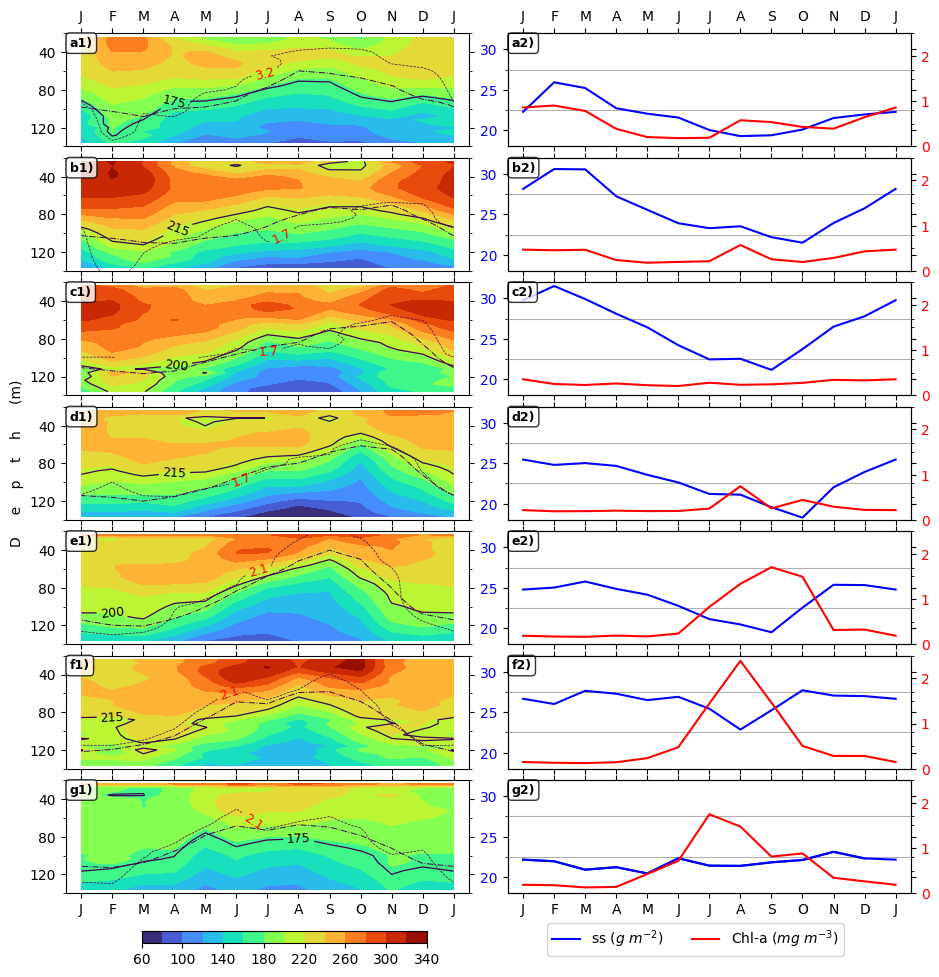

In [183]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(9.5,10),sharex=True)
oxy_lev = [3.2,1.7,1.7,1.7,2.1,2.1,2.1]
tmp_lev = [23, 23, 23, 23, 23, 23, 23 ]
bm_lev = [175,215,200,215,200,215,175]

print("SS","chl")
plt.subplots_adjust(wspace=0.095,left=0.07,bottom=0.09,top=0.95,
                    hspace=0.1,right = 0.96)
ss_range, chl_range = [],[]
ss_max, ss_min = [],[]
chl_max,chl_min = [],[]

for i in range(7):
    new_time = np.arange(1,14,1)
    new_biomass = np.concatenate([clim[i].BIOMASS1[:,6:35,0,0].values,clim[i].BIOMASS1[0:1,6:35,0,0].values])
    
    x = ax[i,0].contourf(new_time,clim[i].DEPTH1[6:35],new_biomass.T,levels=np.arange(60,341,20),cmap="turbo")
    bmc = ax[i,0].contour(new_time,clim[i].DEPTH1[6:35],new_biomass.T,levels=[bm_lev[i]],linewidths=0.9)
    ax[i,0].clabel(bmc, inline=True, fontsize=9,manual=[bmc_pos[i]],colors='k')
    ax[i,0].set_ylim(ymin=20,ymax=140)
    ax[i,0].invert_yaxis()
    
    ax[i,0].yaxis.set_major_locator(MultipleLocator(40))  # Major ticks every 2 units
    ax[i,0].yaxis.set_minor_locator(MultipleLocator(20))  # Minor ticks every 0.5 units    
    ax[i,0].yaxis.set_major_formatter(ScalarFormatter())

    temp = ch_clim.TEMP.sel(Lon=lons[i],Lat=lats[i],method='nearest')
    temp1 = temp.sel(Depth=slice(0,145))
    new_temp = np.concatenate([temp1.values,temp1[0:1,:].values])
    ax[i,0].contour(new_time,temp1.Depth[6:],new_temp[:,6:].T,levels=[23],linestyles='dashdot',linewidths=0.7)

    oxy = woa_13.O_AN2.sel(LON241_280=lons[i],LAT91_117=lats[i],method='nearest')
    oxy1 = oxy.sel(DEPTH=slice(0,145))
    new_oxy = np.concatenate([oxy1.values,oxy1[0:1,:].values])
    oxc = ax[i,0].contour(new_time,oxy1.DEPTH[6:],new_oxy[:,6:].T,levels=[oxy_lev[i]],linestyles='dashed',linewidths=0.5)
    ax[i,0].clabel(oxc, inline=True, fontsize=9,manual=[oxy_pos[i]],colors='r')

    ax[i,0].text(0.010, 0.97, figlab1[i],transform=ax[i,0].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    
    ax[i,1].text(0.010, 0.97, figlab2[i],transform=ax[i,1].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    


    new_ss =  np.concatenate([ds_ss[i].SS[:,0,0].values,ds_ss[i].SS[:,0,0].values[0:1]])
    ax[i,1].plot(new_time,new_ss,'b')    
    ax[i,1].set_ylim(ymin=18,ymax=32)
    ax[i,1].tick_params(axis='y', labelcolor='b')
    ax2 = ax[i,1].twinx()
    new_chl = np.concatenate([chl_clim[i][:,0,0].values,chl_clim[i][:,0,0].values[0:1]])
    ax2.plot(new_time,new_chl,"r") 
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(ymin=0,ymax=2.5)
    
    #print the difference
    ss_range_e = np.max(new_ss)- np.min(new_ss)
    chl_range_e = np.max(new_chl)- np.min(new_chl)
    print(np.round(ss_range_e,4),np.round(chl_range_e,4)) 
    ss_range.append(ss_range_e)
    chl_range.append(chl_range_e)

    ss_max.append(np.max(new_ss))
    ss_min.append(np.min(new_ss))

    chl_max.append(np.max(new_chl))
    chl_min.append(np.min(new_chl))

    
    ax[i,1].yaxis.set_major_locator(MultipleLocator(5))  # Major ticks every 2 units
    ax[i,1].yaxis.set_minor_locator(MultipleLocator(2.5))  # Minor ticks every 0.5 units    
    ax[i,1].yaxis.set_major_formatter(ScalarFormatter())
    ax2.yaxis.set_major_locator(MultipleLocator(1))  # Major ticks every 2 units
    ax2.yaxis.set_minor_locator(MultipleLocator(0.5))  # Minor ticks every 0.5 units    
    ax2.yaxis.set_major_formatter(ScalarFormatter())


ax[6,1].plot(clim[6].month,ds_ss[6].SS[:,0,0],"b",label="ss ($g\\ m^{-2}$)") 
ax[6,1].plot(clim[6].month,chl_clim[6][:,0,0],"r",label="Chl-a ($mg\\ m^{-3}$)") 
ax[6,1].legend(bbox_to_anchor=(0.85, -0.2),ncol=2)


ax[3,0].set_ylabel("D     e    p    t    h      (m)")
ax[6,0].set_xticks(new_time)
ax[6,0].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D','J'])
ax[6,0].set_xlim(xmin=0.5,xmax=13.5)

ax[0,0].tick_params(axis='x', which='both', bottom=True, top=True, labeltop=True)
ax[0,0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[6,0].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
ax[6,0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[0,1].tick_params(axis='x', which='both', bottom=True, top=True, labeltop=True)
ax[0,1].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[6,1].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
ax[6,1].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

ax[6,1].set_xticks(new_time)
ax[6,1].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D','J'])
ax[6,1].set_xlim(xmin=0.5,xmax=13.5)

#put the tick marks in between the subplots (1, 6)
for i in range(1,6):
    ax[i,0].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i,0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)
    ax[i,1].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i,1].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)
for i in range(7):
    ax[i,1].grid(visible=True, which='minor', axis='y')

cax = fig.add_axes([0.15, 0.04, 0.3,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal")
plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/climatology/climatology_biomass_ss_chl.png",dpi=400)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/climatology_biomass_ss_chl.png",dpi=400)

In [141]:
df["ss_range"]= ss_range
df["ss_max"] =ss_max
df["ss_min"] =ss_min
df["chl_range"] = chl_range
df["chl_max"] =chl_max
df["chl_min"] =chl_min

In [68]:
df.to_excel("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/stats/stats.xlsx")

# OXYGEN

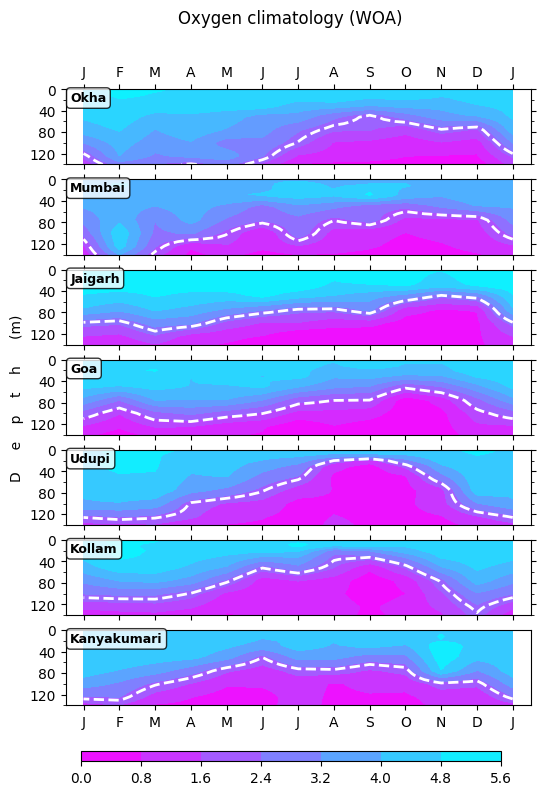

In [108]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(6,8),sharex=True)
new_time = np.arange(1,14,1)

for i in range(7):
    oxy = woa.OXY.sel(LON61_110=lons[i],LAT91_117=lats[i],method='nearest')
    oxy1 = oxy.sel(LEV=slice(0,145))
    new_oxy = np.concatenate([oxy1.values,oxy1[0:1,:].values])
    x = ax[i].contourf(new_time,oxy1.LEV[:],new_oxy[:,:].T,cmap="cool_r")
    ax[i].contour(new_time,oxy1.LEV[:],new_oxy[:,:].T,levels=[oxy_lev[i]],linestyles='dashed',colors='white',linewidths=2)
    ax[i].text(0.010, 0.97, names[i],transform=ax[i].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    
    ax[i].yaxis.set_major_locator(MultipleLocator(40))  # Major ticks every 2 units
    ax[i].yaxis.set_minor_locator(MultipleLocator(20))  # Minor ticks every 0.5 units    
    ax[i].yaxis.set_major_formatter(ScalarFormatter())
    
    ax[i].invert_yaxis()
    
ax[3].set_ylabel("D     e    p    t    h      (m)")
ax[6].set_xticks(np.arange(1,14,1))
ax[6].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D',"J"])
ax[6].set_xlim(xmin=0.5,xmax=13.5)

ax[0].tick_params(axis='x', which='both', bottom=True, top=True, labeltop=True)
ax[0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

for i in range(1,6):
    ax[i].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)
fig.suptitle("Oxygen climatology (WOA)")
cax = fig.add_axes([0.15, 0.04, 0.7,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/oxygen_temp/oxygen.png",dpi=300)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/oxygen.png",dpi=300)



# TEMP

In [ ]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(8,8),sharex=True)

for i in range(7):
    temp = ch_clim.TEMP.sel(Lon=lons[i],Lat=lats[i],method='nearest')
    temp1 = temp.sel(Depth=slice(0,145))
    new_temp = np.concatenate([temp1.values,temp1[0:1,:].values])
    x = ax[i].contourf(new_time,temp1.Depth[5:],new_temp[:,5:].T,cmap="plasma")
    ax[i].contour(new_time,temp1.Depth[5:],new_temp[:,5:].T,levels=[23],linestyles='dashed',colors='white',linewidths=2)
    ax[i].text(0.010, 0.97, names[i],transform=ax[i].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))    
    ax[i].yaxis.set_major_locator(MultipleLocator(40))  # Major ticks every 2 units
    ax[i].yaxis.set_minor_locator(MultipleLocator(20))  # Minor ticks every 0.5 units    
    ax[i].yaxis.set_major_formatter(ScalarFormatter())
    
    ax[i].invert_yaxis()
    
ax[3].set_ylabel("D     e    p    t    h      (m)")
ax[6].set_xticks(np.arange(1,14,1))
ax[6].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D',"J"])
ax[6].set_xlim(xmin=0.5,xmax=13.5)

ax[0].tick_params(axis='x', which='both', bottom=True, top=True, labeltop=True)
ax[0].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)

for i in range(1,6):
    ax[i].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i].tick_params(axis='y', which='both', left=True, right=True, labelleft=True)
fig.suptitle("TEmperature climatology (Chatterjee)")

cax = fig.add_axes([0.15, 0.04, 0.7,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/oxygen_temp/temperature.png",dpi=300)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/temperature.png",dpi=300)

